In [1]:
import pandas as pd
import numpy as np
import datetime

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt

In [3]:
#define name of user list
unames = ['user_id', 'gender', 'age', 'occupation', 'zip']
users = pd.read_csv('D:/Tsukuba/My Research/recommend/ml-1m/users.csv', sep='::', header=None, names=unames)
users.head(5)

c:\users\jelly\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:3: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  This is separate from the ipykernel package so we can avoid doing imports until


,user_id,gender,age,occupation,zip
0,1,F,1,10,48067
1,2,M,56,16,70072
2,3,M,25,15,55117
3,4,M,45,7,02460
4,5,M,25,20,55455


In [4]:
users.count()

user_id       6040
gender        6040
age           6040
occupation    6040
zip           6040
dtype: int64

In [5]:
#define ratings and moives
rating_names = ['user_id', 'movie_id', 'rating', 'timestamp']
ratings = pd.read_csv('D:/Tsukuba/My Research/recommend/ml-1m/ratings.csv', sep='::', header=None, names=rating_names)
ratings['timestamp'] = ratings.timestamp.map(datetime.datetime.utcfromtimestamp)
movie_names = ['movie_id', 'title', 'genres']
movies = pd.read_csv('D:/Tsukuba/My Research/recommend/ml-1m/movies.csv', sep='::', header=None, names=movie_names)
ratings.head(5)

c:\users\jelly\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:3: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  This is separate from the ipykernel package so we can avoid doing imports until
c:\users\jelly\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:6: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  


,user_id,movie_id,rating,timestamp
0,1,1193,5,2000-12-31 22:12:40
1,1,661,3,2000-12-31 22:35:09
2,1,914,3,2000-12-31 22:32:48
3,1,3408,4,2000-12-31 22:04:35
4,1,2355,5,2001-01-06 23:38:11


In [6]:
ratings.count()

user_id      1000209
movie_id     1000209
rating       1000209
timestamp    1000209
dtype: int64

In [7]:
movies.head(5)

,movie_id,title,genres
0,1,Toy Story (1995),Animation|Children's|Comedy
1,2,Jumanji (1995),Adventure|Children's|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama
4,5,Father of the Bride Part II (1995),Comedy


In [8]:
movies.count()

movie_id    3883
title       3883
genres      3883
dtype: int64

##### ユーザーと映画の数

In [9]:
n_users = ratings.user_id.unique().shape[0]
n_movies = ratings.movie_id.unique().shape[0]

In [10]:
print('Number of users:{0}\nNumber of movies:{1}'.format(str(n_users), str(n_movies)))

Number of users:6040
Number of movies:3706


#### Popularity of movies
各映画の人数を数えると、その映画の降順的な人気を見ることができます。

In [11]:
moviefreq = ratings.movie_id.value_counts()
moviefreq.count()

3706

In [12]:
sorted_byfreq = movies.loc[moviefreq.index]#Get info according to frequency
sorted_byfreq['ramking'] = range(moviefreq.count())#Add ramking
sorted_byfreq['freq'] = moviefreq #Add frequency
sorted_byfreq.iloc[0:10]#Top 10 popular movies

c:\users\jelly\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  """Entry point for launching an IPython kernel.


,movie_id,title,genres,ramking,freq
2858,2927.0,Brief Encounter (1946),Drama|Romance,0,3428
260,263.0,Ladybird Ladybird (1994),Drama,1,2991
1196,1214.0,Alien (1979),Action|Horror|Sci-Fi|Thriller,2,2990
1210,1228.0,Raging Bull (1980),Drama,3,2883
480,484.0,Lassie (1994),Adventure|Children's,4,2672
2028,2097.0,Something Wicked This Way Comes (1983),Children's|Horror,5,2653
589,593.0,"Silence of the Lambs, The (1991)",Drama|Thriller,6,2649
2571,2640.0,Superman (1978),Action|Adventure|Sci-Fi,7,2590
1270,1290.0,Some Kind of Wonderful (1987),Drama|Romance,8,2583
593,597.0,Pretty Woman (1990),Comedy|Romance,9,2578


#### Distribution of ratings for each movie

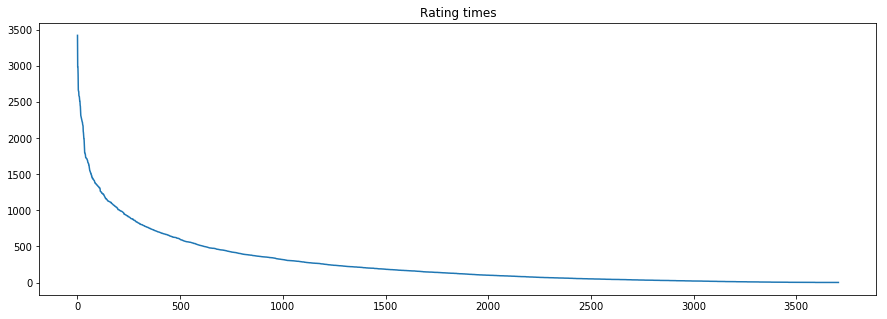

In [13]:
moviefreq1 = moviefreq.copy()
moviefreq1.index = range(moviefreq1.count())
fig, ax = plt.subplots(1, 1, figsize=(15, 5))
moviefreq1.plot(ax=ax, title='Rating times')

##### 3883本映画の中に最大レーティング数は3428で、6040のユーザーは映画の数よりも多いである。推薦のスペースが大きいことがわかります。

#### Scoring time interval
ユーザー評価時間の頻度分布

In [14]:
ts = ratings.timestamp.copy()
ts.head(5)

0   2000-12-31 22:12:40
1   2000-12-31 22:35:09
2   2000-12-31 22:32:48
3   2000-12-31 22:04:35
4   2001-01-06 23:38:11
Name: timestamp, dtype: datetime64[ns]

In [15]:
ts2 = pd.Series(np.ones(ts.count()).astype('Int32'), index=ts.values).sort_index()
ts3 = ts2.to_period('Y').groupby(level=0).count()

c:\users\jelly\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: Numeric-style type codes are deprecated and will result in an error in the future.
  """Entry point for launching an IPython kernel.


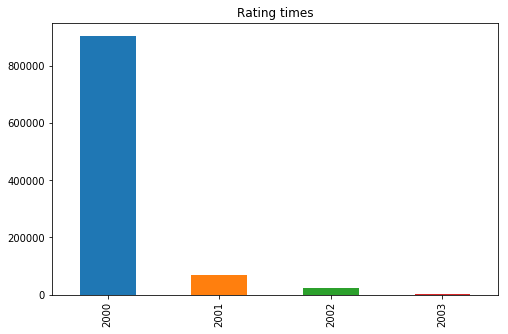

In [16]:
fig, ax = plt.subplots(1, 1, figsize=(8, 5))
ts3.plot(ax=ax, kind='bar', title='Rating times')

#### Rating ranking by average score

In [17]:
meanrating = ratings['rating'].groupby(ratings['movie_id']).mean()

In [18]:
meanrating = meanrating.sort_values(ascending = False)
meanrating.head(5)

movie_id
3382    5.0
3172    5.0
3607    5.0
3656    5.0
3280    5.0
Name: rating, dtype: float64

In [19]:
sorted_byrate = movies.loc[meanrating.index]
sorted_byrate['ranking'] = range(meanrating.count())#Add ranking
sorted_byrate['rating'] = meanrating#Add rating
sorted_byrate['freq'] = moviefreq.loc[meanrating.index]#Add rate frequency
sorted_byrate.iloc[0:10] #Top 10 popular movies

c:\users\jelly\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  """Entry point for launching an IPython kernel.


,movie_id,title,genres,ranking,rating,freq
movie_id,,,,,,
3382,3451.0,Guess Who's Coming to Dinner (1967),Comedy|Drama,0,5.0,1
3172,3241.0,"Cup, The (Ph鰎pa) (1999)",Comedy,1,5.0,1
3607,3676.0,Eraserhead (1977),Drama|Horror,2,5.0,1
3656,3725.0,American Pop (1981),Animation|Musical,3,5.0,1
3280,3349.0,"Perils of Pauline, The (1947)",Comedy,4,5.0,1
787,797.0,"Old Lady Who Walked in the Sea, The (Vieille q...",Comedy,5,5.0,3
1830,1899.0,Passion in the Desert (1998),Adventure|Drama,6,5.0,1
989,1002.0,Ed's Next Move (1996),Comedy,7,5.0,1
3881,3951.0,Two Family House (2000),Drama,8,5.0,1


5点映画の評価は1つだけです。これでランキングが上がります！それは平均スコアが信頼できないようです、評価の頻度は考慮に入れられなければなりません。まず、30未満のスコアをチェックアウトします。

In [20]:
sorted_byrate2 = sorted_byrate[sorted_byrate.freq>30]
sorted_byrate2.head(10)

,movie_id,title,genres,ranking,rating,freq
movie_id,,,,,,
2905,2974.0,Bats (1999),Horror|Thriller,13,4.608696,69
2019,2088.0,Popeye (1980),Adventure|Comedy|Musical,14,4.560510,628
318,321.0,Strawberry and Chocolate (Fresa y chocolate) (...,Drama,15,4.554558,2227
858,869.0,Kansas City (1996),Crime,16,4.524966,2223
745,755.0,Kim (1950),Children's|Drama,17,4.520548,657
50,51.0,Guardian Angel (1994),Action|Drama|Thriller,18,4.517106,1783
527,531.0,"Secret Garden, The (1993)",Children's|Drama,19,4.510417,2304
1148,1164.0,Two or Three Things I Know About Her (1966),Drama,20,4.507937,882
922,934.0,Father of the Bride (1950),Comedy,29,4.491489,470


#### Correlation between the mean score and the number of ratings

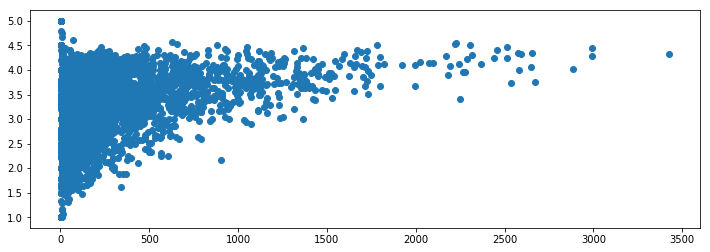

In [21]:
fig, ax = plt.subplots(1, 1, figsize=(12, 4))
ax.scatter(sorted_byrate['freq'], sorted_byrate['rating'])

全局から、評価数は多く、平均スコアも高いです。一般に流行している映画はたくさんありますが、品質高い映画もたくさんありますが、見た人はほとんどいません。

#### Anti-cheating in rating
不正評価があるかどうか

In [22]:
userfreq = ratings.user_id.value_counts()
userfreq.count()

6040

In [23]:
userfreq.head()

4169    2314
1680    1850
4277    1743
1941    1595
1181    1521
Name: user_id, dtype: int64

Text(0,0.5,'Rating times')

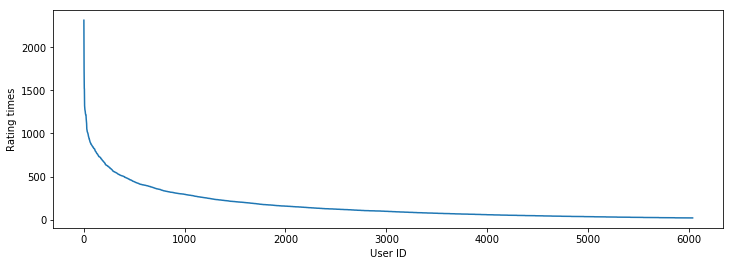

In [24]:
timesfreq = userfreq.copy()
timesfreq.index = range(timesfreq.count())
#timesfreq.head()
fig, ax = plt.subplots(1, 1, figsize=(12, 4))
timesfreq.plot(ax=ax)
ax.set_xlabel('User ID')
ax.set_ylabel('Rating times')

In [25]:
timesfreq[timesfreq>1000].count()

40

レーティング回数が1000を超える人の数は40です。不正評価がありませんようになります。

#### Distribution of movie time

In [26]:
movies.title.head()

0                      Toy Story (1995)
1                        Jumanji (1995)
2               Grumpier Old Men (1995)
3              Waiting to Exhale (1995)
4    Father of the Bride Part II (1995)
Name: title, dtype: object

In [27]:
movieyears = movies.title.str.extract('(\((\d{4})\))', expand=True).ix[:, 1]
yearfreq = movieyears.value_counts()
yearfreqsort = yearfreq.sort_index()
yearfreqsort.head()

c:\users\jelly\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  """Entry point for launching an IPython kernel.


1919    3
1920    2
1921    1
1922    2
1923    3
Name: 1, dtype: int64

#### Distribution of film genres

In [28]:
genreslist = []
genreseries = movies.genres.str.split(pat='|')
genrecount = genreseries.count()
for i in range(genrecount):
    genreslist.extend(genreseries.iloc[i])
len(genreslist)

6408

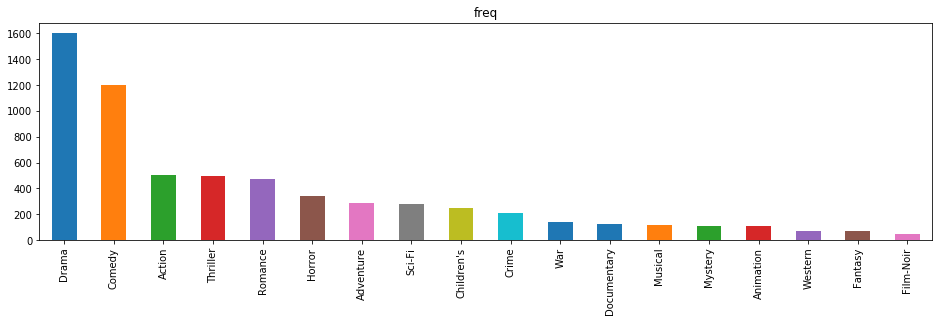

In [29]:
allmoviegenres = pd.Series(genreslist)
genrestats = allmoviegenres.value_counts()
fig, ax = plt.subplots(1, 1, figsize=(16, 4))
genrestats.plot(ax=ax, kind='bar', title='freq')

映画で得点したすべてのジャンルを取り出し、ユーザーが見た映画のジャンルの分布を見るために、ジャンルの統計を行います。ユーザーの視聴履歴は、ユーザーの興味を表します。